## The Sparks Foundation - GRIP

### Data Science & Business Analytics Intern - January'22

**Task 3: Exploratory Data Analysis - Retail**

### Objectives

1. Identify the weak areas that could be worked on to make more profit.
2. Derive all business problems ny exploring the data.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation and Cleaning

In [4]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
len(data)

9994

In [14]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
data["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [16]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [17]:
data["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

In [18]:
data["City"].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Montebello         1
San Mateo          1
Springdale         1
Baytown            1
Santa Maria        1
Name: City, Length: 531, dtype: int64

In [27]:
data["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [21]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [22]:
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

From the above results, the `Country` is constant so we can remove the column. The `Postal Code` column can also be remove since it has no effect on our analysis

In [28]:
data.drop(["Country", "Postal Code"], axis=1, inplace=True)
data.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [29]:
# Make a correlation matrix
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


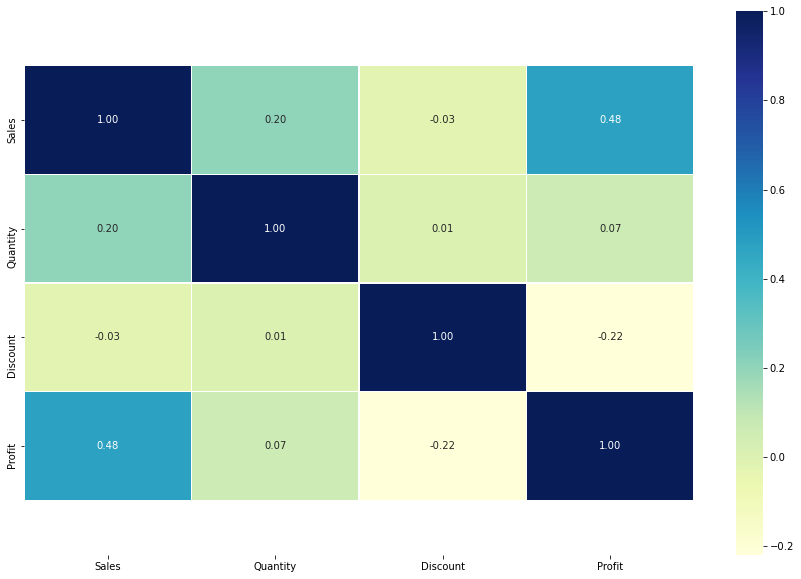

In [30]:
# Visualizing the correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## Explortory Analysis and Visualization

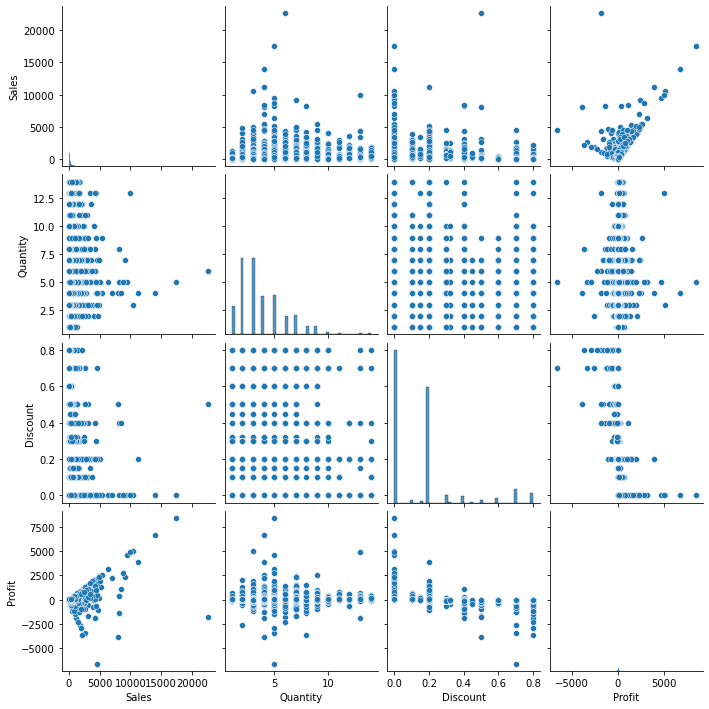

In [32]:
sns.pairplot(data)
plt.show

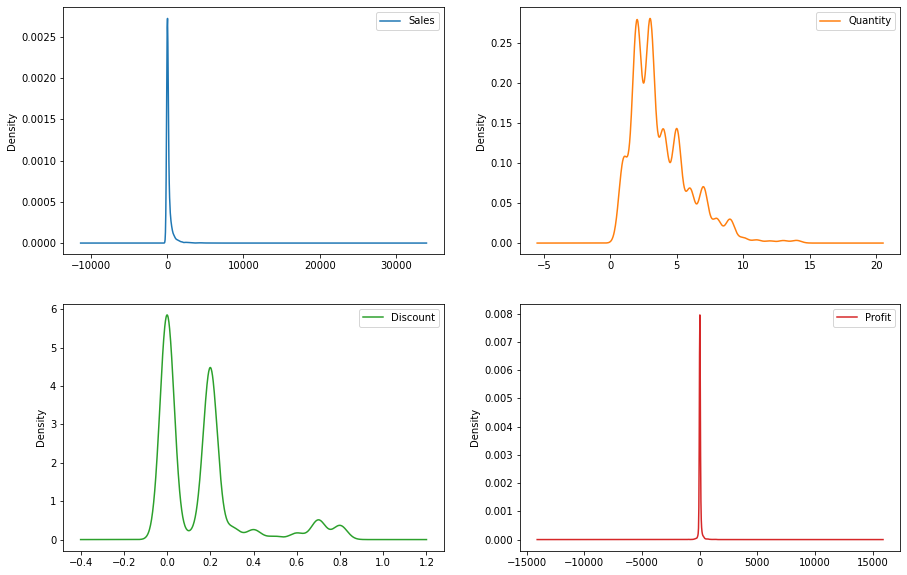

In [36]:
# Distribution of numeric Variables
data_numeric = data.select_dtypes(include='number')
data_numeric.plot(kind="kde", subplots=True, layout=(2,2), sharex=False, figsize=(15,10))
plt.show()

From the above plot, there are many extreme values in Sales and Profit and few in Discount and Quantity.

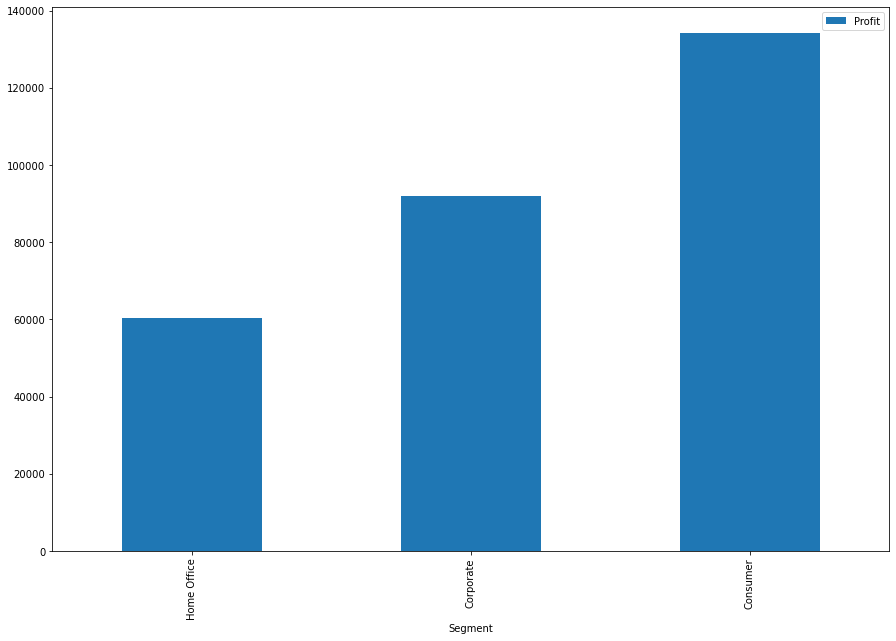

In [37]:
# Finding out which segment has the highest and lowest profit
x = data.groupby(by='Segment')[['Profit']].sum()
y = x.sort_values(by=['Profit'],ascending=True)

y.plot(kind='bar', figsize=(15,10))
plt.show()

**Observation 1 - From the above plot we can see that Consumer has the highest profit where as Home Office has the lowest profit. So to increase profit we must focus on Home Office Segment.**

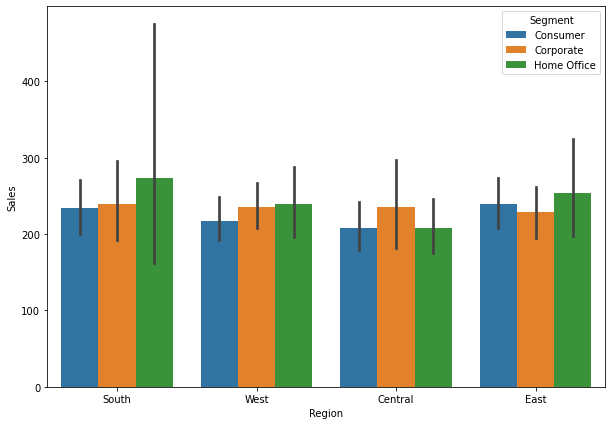

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region", y="Sales", hue="Segment", data=data)
plt.show()

**Observation 2 - From the above plot we can see that in the South region, Home Office has the highest sales whereas Corporate&Consumer had almost equal sales. In the West Region, Consumeer had the Lowest sales and the other two are almost equal. In central region, Corporate had the highest sales whereas Consumer and Home Ofiice have almost equal profit. In East region, Home office had the highest sales whereas Consumer and Corporate have almost equal sales. In order to increase the profit the segments having lowest sale must be taken care of.**

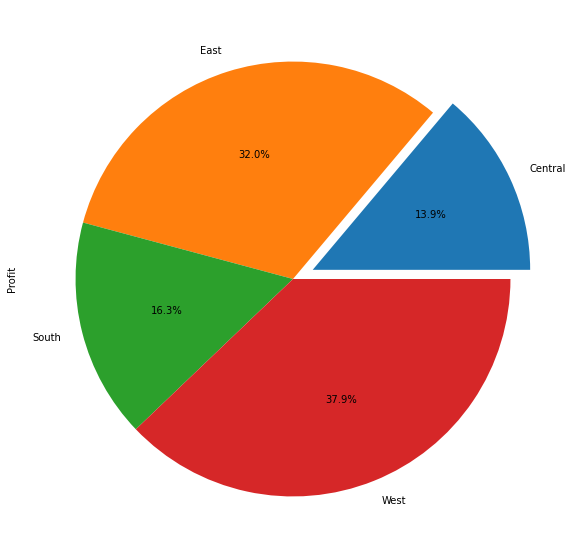

In [42]:
plt.figure(figsize=(15,10))
data.groupby(by="Region")["Profit"].sum().plot(kind="pie", 
                                               autopct='%1.1f%%', 
                                               explode=(0.1, 0, 0, 0))
plt.show()

**Observation 3 - From the pie chart above it is clearly visible that the Central Region has the lowest sales whereas the West Region has the Highest sales. So in order to increase Profit we must focus on Central and South Region**

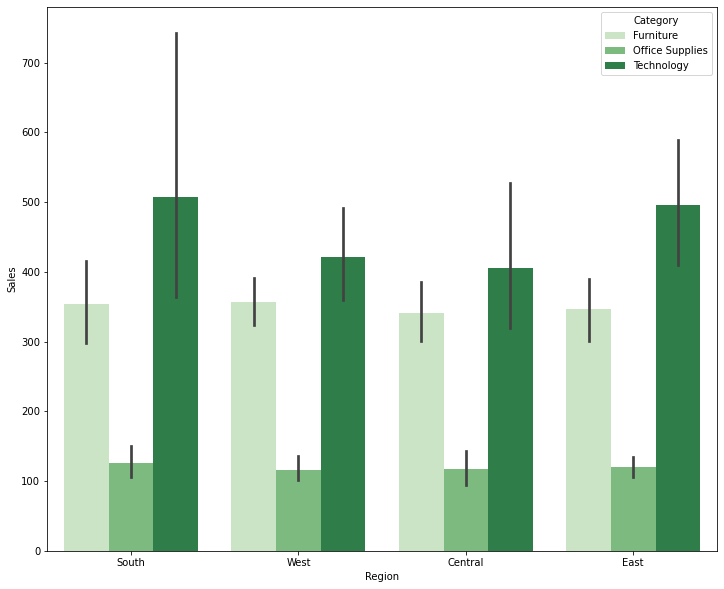

In [48]:
plt.figure(figsize=[12,10])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=data, palette="Greens")
plt.show()

**Observation 4 - In each and every every region, sales for 'Office Supplies' are very poor. Furniture and Technology are well ahead.**

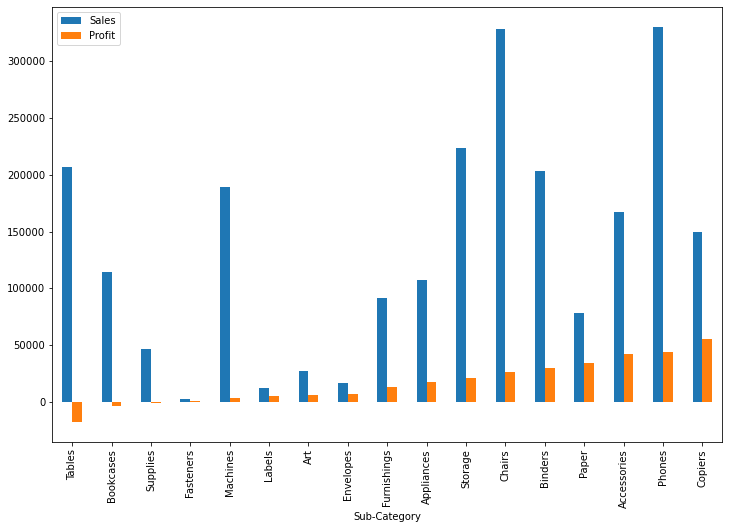

In [51]:
subcategory_groupby = data.groupby(by = 'Sub-Category')[["Sales", "Profit"]].sum()
sort_profit2 = subcategory_groupby.sort_values(by=["Profit"], ascending=True)
sort_profit2.plot(kind="bar", figsize=(12,8))
plt.show()

**Observation 5 - From the graph above we can see that the Tables have the Lowest Profit and the Copiers has the Highest Profit. The Sales is Highest in case of phones and lowest in case of Fasteners**

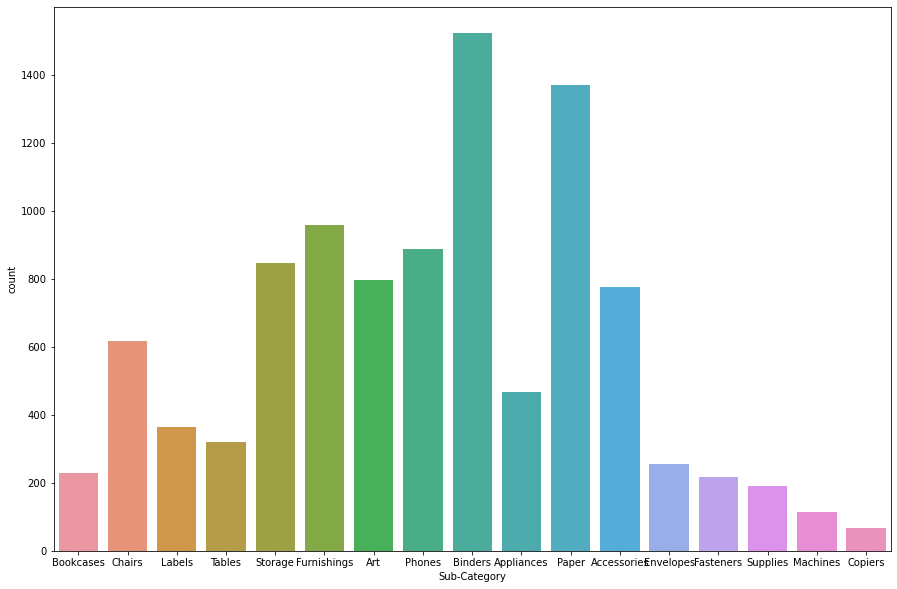

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(x="Sub-Category", data=data)
plt.xticks(rotation=0)
plt.show()

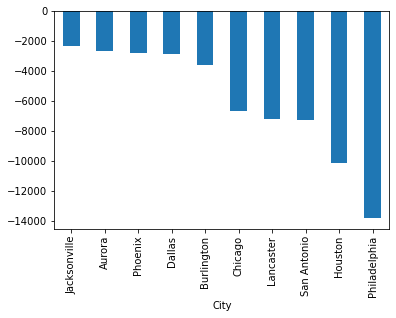

In [52]:
data.groupby(by="City")["Profit"].sum().sort_values(ascending=False)[521:].plot(kind="bar")
plt.show()

**Observation 6 - Philadelphia has the lowest profit, so we must focus more on them to reverse the case**

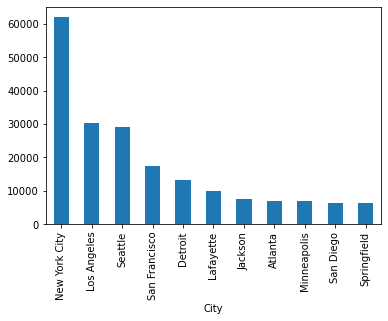

In [53]:
data.groupby(by="City")["Profit"].sum().sort_values(ascending=False)[:11].plot(kind="bar")
plt.show()

**Observation 7 - New york city has the Highest Profit, followed by Los Angeles and San Fracisco.**

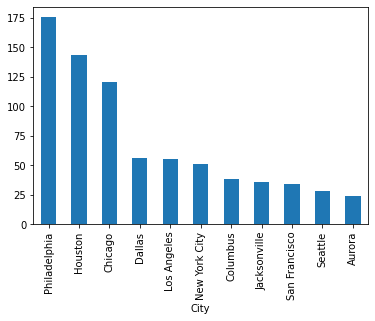

In [55]:
data.groupby(by="City")["Discount"].sum().sort_values(ascending=False)[:11].plot(kind="bar")
plt.show()

**Observation 8 - Philadelphia gives way high discount, that might be the cause of their Low Profit**

In [64]:
# Average Discount per city
avg_dist=data.groupby(by="City")['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Abilene,0.8
1,Deer Park,0.8
2,Romeoville,0.8
3,Missouri City,0.8
4,Elyria,0.7


In [65]:
# Cities with lowest Average Discount
avg_dist.tail()

,City,Discount
526,Richmond,0.0
527,New Brunswick,0.0
528,New Bedford,0.0
529,New Albany,0.0
530,Aberdeen,0.0


In [66]:
# Average Sales per city
avg_sales=data.groupby(by="City")['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Jamestown,2354.395000
1,Cheyenne,1603.136000
2,Bellingham,1263.413333
3,Independence,1208.685000
4,Burbank,1082.386000


In [67]:
# Cities with lowest Average sales
avg_sales.tail()

,City,Sales
526,Ormond Beach,2.808
527,Pensacola,2.214
528,Jupiter,2.064
529,Elyria,1.824
530,Abilene,1.392


In [68]:
# Average Profit per city
avg_profit=data.groupby(by="City")['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Jamestown,642.885750
1,Independence,487.831500
2,Lafayette,323.173794
3,Minneapolis,296.721070
4,Appleton,277.383150


In [69]:
# Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Lancaster,-157.371052
527,Round Rock,-169.061614
528,Oswego,-178.709200
529,Champaign,-182.352000
530,Bethlehem,-200.619160


In [70]:
# Cities having High Average Discounts
high_dist = avg_dist[avg_dist['Discount'] >= 0.7]

# Cities having Low Average Discounts
low_dist = avg_dist[avg_dist['Discount'] == 0]

# Cities having High Average Sales
high_sales = avg_sales[avg_sales['Sales'] > 500]

# Cities having Low Average Sales
low_sales = avg_sales[avg_sales['Sales'] < 50]

# Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit'] > 100]

# Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit'] < 0]

# Cities with High-Average-Discounts but Low-Average-Sales
merged = pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Abilene,0.8,1.392
1,Deer Park,0.8,6.924
2,Romeoville,0.8,8.952
3,Missouri City,0.8,6.370
4,Elyria,0.7,1.824
5,Pensacola,0.7,2.214
6,Ormond Beach,0.7,2.808


**Important Insight 1 - Here we can see 7 Cities where the Company is giving high discounts but Sales are very low. We need to lower the discounts rate or we shouldn't offer discount to customers anymore**

In [71]:
# Cities with high Average Sales as well as Average Profit
merged2 = pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Jamestown,2354.395000,642.885750
1,Cheyenne,1603.136000,100.196000
2,Bellingham,1263.413333,203.530267
3,Independence,1208.685000,487.831500
4,Burbank,1082.386000,254.844600
5,Beverly,861.063333,218.306467
6,Appleton,835.655000,277.383150
7,Lafayette,807.619355,323.173794
8,Torrance,783.067000,136.287750
9,Lehi,758.363000,225.831300


**Important Insight 2 -The stats above are very pleasing. In all the 15 Cities the sales as well as profit are quite good. Hence if we can invest in these cities (in terms of Discount and other aspects), business can increase more.**

In [72]:
# Cities where Average Discount is less but Average Sales is High
merged3 = pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Morristown,0.0,719.014286
2,Minneapolis,0.0,733.501739
3,Harrisonburg,0.0,626.958571
4,Dubuque,0.0,562.433333
5,Norman,0.0,675.665000
6,Beverly,0.0,861.063333
7,Noblesville,0.0,772.795000
8,Madison,0.0,534.679000
9,Lafayette,0.0,807.619355


**Important Insight 3 - The 10 cities are generating high average sales in spite of zero discount! Hence if our investments can be increased in these cities, then huge sales as well as huge profits can be driven from these Cities.**

In [73]:
# Cities with high Average sales but low Average profit
merged4 = pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Burlington,866.723280,-144.915088
1,Round Rock,693.436114,-169.061614
2,Richardson,644.232000,-12.244650


**Important insight 4 - In Burlington city, good amount of sales are there but the company is going with loss. Hence attention as to be drawn to the city to find out the course of the loss**

In [74]:
# Cities with high Average discount but low Average profit
merged5 = pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Abilene,0.8,-3.7584
1,Deer Park,0.8,-10.3860
2,Romeoville,0.8,-14.7708
3,Missouri City,0.8,-9.5550
4,Elyria,0.7,-1.3984
5,Pensacola,0.7,-1.4760
6,Ormond Beach,0.7,-1.9656
7,Littleton,0.7,-98.8018


**Important insight 5 - The 8 countries above gets highest average Discount, but here the business is generating loss! Either strong focus is to be given in these cities to find out the faults or Discounts are to withdrawn to make up the loss.**

In [75]:
# Cities with low Average discount but High Average profit
merged6 = pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Appleton,0.0,277.383150
1,Florence,0.0,103.284100
2,Muskogee,0.0,110.649150
3,Greenwood,0.0,117.933050
4,Morristown,0.0,262.603871
5,Minneapolis,0.0,296.721070
6,Mobile,0.0,197.802655
7,Broken Arrow,0.0,115.104520
8,Harrisonburg,0.0,127.074843
9,Washington,0.0,105.958930


**Important insight 6 - Here are the 18 countries, where the company is not at all providing any discount, yet these cities are genetating good amount of profit. Hence more and more care is to be taken and investments are to be made to maximise profits**

**Author - Jammal Adeyemi**